# Week5 Regression Prediction For Laptop Price

## 1.Introduction

In this week's project, based on a dataset containing different laptop features and specifications, I attempted to use regression models to predict the price of laptops.

The primary reason for selecting this dataset is its feature composition. When predicting real-world problems, it is essential to consider not only numerical factors but also categorical ones. For example, in the classic house price prediction problem, quantifiable attributes such as the house’s size are important, but factors like location and city also play a crucial role in determining prices. In order to be closer to the actual application scenario, I hope to be able to choose a dataset with relatively complex feature types so that I can better practice. And I finally chose this one for predicting laptop prices. Since the majority of its features are object-type data, I processed these features in the following process and  applied regression modeling by this dataset.

The first step of the project involves `processing and analyzing the raw dataset`, which includes handling missing values , understanding the characteristics and distributions of different columns and so on. This process helps me to gain a comprehensive understanding of the data.

During the `feature engineering` phase, I categorized the features and designed different processing strategies for each type. Additionally, I explored the `correlations` between features, identify key variables, and eliminate redundant features to enhance the model’s performance and reduce the risk of overfitting.

In the `model training` phase, I selected regression models that are appropriate for the data characteristics, including but not limited to linear regression and tree-based regression models. I also fine-tuned the model’s parameters, ultimately identifying the optimal model for price prediction.

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import matplotlib


## 2. Data Preprocess And Analysis


In [37]:
df_train = pd.read_csv(r"../Datasets\laptops_test.csv") 
df_test = pd.read_csv(r"../Datasets\laptops_train.csv")

To facilitate data processing, I merged the df_train and df_test datasets using `.concat()` and performed an overview of the combined dataset.

In [38]:
# preprocess datasets
df = pd.concat([df_train,df_test]) 
df.shape

(1302, 13)

In [39]:
df.head()

,Manufacturer,Model Name,Category,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price
0,HP,15-bs053od (i7-7500U/6GB/1TB/W10),Notebook,"15.6""",1366x768,Intel Core i7 7500U 2.7GHz,6GB,1TB HDD,Intel HD Graphics 620,Windows,10,2.04kg,5148468.0
1,Asus,Rog GL753VE-DS74,Gaming,"17.3""",Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows,10,2.99kg,15552108.0
2,Dell,Inspiron 7579,2 in 1 Convertible,"15.6""",IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,12GB,512GB SSD,Intel HD Graphics 620,Windows,10,2.19kg,11550708.0
3,Toshiba,Portege Z30-C-1CV,Notebook,"13.3""",Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows,7,1.2kg,10625940.0
4,Lenovo,IdeaPad 320-15ABR,Notebook,"15.6""",Full HD 1920x1080,AMD A12-Series 9720P 3.6GHz,6GB,256GB SSD,AMD Radeon 530,Windows,10,2.2kg,4881708.0


In [40]:
df.columns

Index(['Manufacturer', 'Model Name', 'Category', 'Screen Size', 'Screen',
       'CPU', 'RAM', ' Storage', 'GPU', 'Operating System',
       'Operating System Version', 'Weight', 'Price'],
      dtype='object')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 976
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Manufacturer              1302 non-null   object 
 1   Model Name                1302 non-null   object 
 2   Category                  1302 non-null   object 
 3   Screen Size               1302 non-null   object 
 4   Screen                    1302 non-null   object 
 5   CPU                       1302 non-null   object 
 6   RAM                       1302 non-null   object 
 7    Storage                  1302 non-null   object 
 8   GPU                       1302 non-null   object 
 9   Operating System          1302 non-null   object 
 10  Operating System Version  1132 non-null   object 
 11  Weight                    1302 non-null   object 
 12  Price                     1302 non-null   float64
dtypes: float64(1), object(12)
memory usage: 142.4+ KB


After conducting an overview of the dataset, I found:

* The dataset includes information on 1,302 distinct laptops. Excluding the price, it contains 12 multidimensional features covering aspects such as brand, hardware, and device parameters.

* The data types of these features are all `object`, which include some non-numeric values that cannot be directly used in subsequent regression predictions. This necessitates the application of feature engineering strategies, such as encoding, to process these features.

* There are missing values in the `Operating System Version` column that need to be addressed.

Next, I will perform some preprocessing on the data to prepare for the subsequent feature engineering and regression prediction tasks.

During the previous data overview, I noticed that the `Price` values seemed unusually high. To validate this observation, I used `.describe()` to obtain the statistics including Mean, Max and so on .

Since the other columns have a data type of object, the `.describe()` method only displayed the statistics for the price column.

In [42]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Price,1302.0,9987212.68,6215745.9,1547208.0,5326308.0,8687484.0,13211978.13,54232308.0


I found that the values in the `Price` were indeed relatively high, which seemed somewhat unreasonable. 

Upon rechecking the original dataset, I discovered in the column description that the price was in `INR` (Indian Rupee).

To facilitate subsequent analysis, I converted the `INR` values to `BRP` (British Pound) and processed the data accordingly.

In [43]:
# INR TO BRP 
df['Price'] = 0.0000414 * df['Price']

In [44]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
Price,1302.0,413.47,257.33,64.05,220.51,359.66,546.98,2245.22


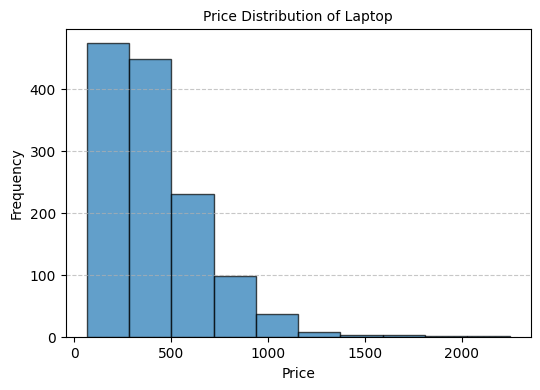

In [45]:
# Price analyze
plt.figure(figsize=(6,4))

plt.hist(df['Price'],bins=10, edgecolor='k', alpha=0.7)
plt.title("Price Distribution of Laptop", fontsize=10)
plt.xlabel("Price", fontsize=10)
plt.ylabel("Frequency", fontsize=10)

# Add a grid to improve readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

At the same time, I plotted the `distribution` of the Price to visually inspect it. 

* The price distribution shows a noticeable right skew, with the majority of laptop prices concentrated between 0 and 500.

* It appears that mid-range and low-end laptops dominate the dataset, which slightly deviates from my initial assumption.

After preprocessing and analyzing the `Price`, I focused on handling the `missing values` in the `Operating System Version` column. 

To determine the number of missing values, I used `.isna()` in combination with `.sum()`.

Here, I chose to process the entire dataset to ensure that I didn’t overlook any missing values in other columns as well.

In [46]:
df.isna().sum()

Manufacturer                  0
Model Name                    0
Category                      0
Screen Size                   0
Screen                        0
CPU                           0
RAM                           0
 Storage                      0
GPU                           0
Operating System              0
Operating System Version    170
Weight                        0
Price                         0
dtype: int64

Generally, removing rows with missing values is a common approach, but in this case, I decided to explore other strategies for handling the missing values.

I replaced the missing values in the `Operating System Version` column with the string `Missing` and then plotted a chart to visualize the frequency of each category within this feature.

<Axes: xlabel='Operating System Version', ylabel='count'>

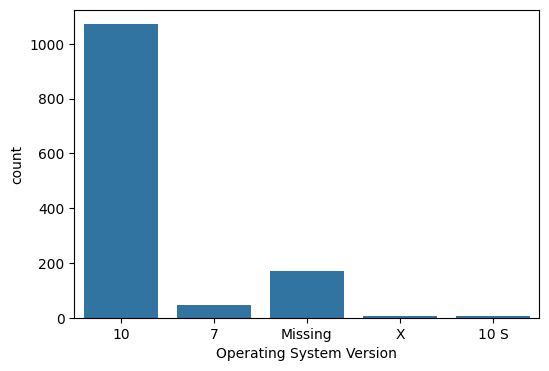

In [47]:
df["Operating System Version"] = df["Operating System Version"].fillna("Missing")

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Operating System Version")

* The number of "Missing" values is still relatively high, even surpassing all other categories except for the "10" category. Removing this portion of the data may not be the most appropriate approach.

* The frequencies of the other categories are quite low, with most of the data concentrated in the "10" category.

* Given this, I am considering using the `mode` (the most frequent value) to fill in the missing values.

<Axes: xlabel='Operating System Version', ylabel='count'>

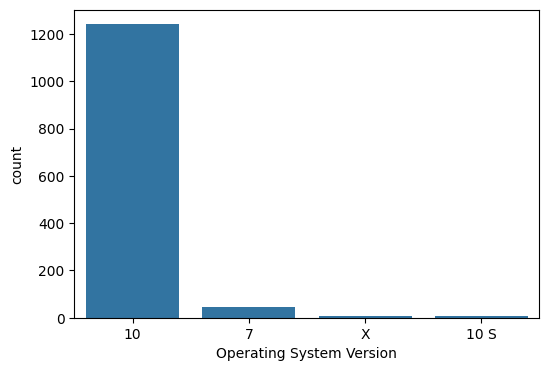

In [48]:
mode_value = df['Operating System Version'].mode()[0]
df["Operating System Version"] = df["Operating System Version"].replace('Missing', mode_value)

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="Operating System Version")

## 3. Feature Engineering

From the analysis above, I found that most of the features are of the `object` type, which is not ideal for model training.

In this phase, I will categorize the features into different types and apply appropriate processing strategies and encoding methods for `numerical` values, `non-numerical` values, `ordinal` variables, and `nominal` variables.

First, I will examine the `unique` values of each feature to better understand their meanings and patterns.

In [49]:
for col in df.columns:
    print(col)
    print(f'first five unique values: {df[col].unique()[0:5]}')
    print(f'Number of unique values: {df[col].nunique()}\n')

Manufacturer
first five unique values: ['HP' 'Asus' 'Dell' 'Toshiba' 'Lenovo']
Number of unique values: 19

Model Name
first five unique values: ['15-bs053od (i7-7500U/6GB/1TB/W10)' 'Rog GL753VE-DS74' 'Inspiron 7579'
 'Portege Z30-C-1CV' 'IdeaPad 320-15ABR']
Number of unique values: 617

Category
first five unique values: ['Notebook' 'Gaming' '2 in 1 Convertible' 'Netbook' 'Ultrabook']
Number of unique values: 6

Screen Size
first five unique values: ['15.6"' '17.3"' '13.3"' '14.0"' '12.5"']
Number of unique values: 18

Screen
first five unique values: ['1366x768' 'Full HD 1920x1080'
 'IPS Panel Full HD / Touchscreen 1920x1080' 'IPS Panel Full HD 1920x1080'
 'Full HD / Touchscreen 1920x1080']
Number of unique values: 40

CPU
first five unique values: ['Intel Core i7 7500U 2.7GHz' 'Intel Core i7 7700HQ 2.8GHz'
 'Intel Core i5 6200U 2.3GHz' 'AMD A12-Series 9720P 3.6GHz'
 'Intel Core i5 7200U 2.5GHz']
Number of unique values: 118

RAM
first five unique values: ['6GB' '16GB' '12GB' '4GB' '

* It is clear that features such as `Manufacturer` and `Category`, which have categorical meaning, cannot be directly processed, and Encoding is a suitable approach for handling them.

* For features like `Weight` and `Screen Size`, which are numerical values but have been converted to the object type due to the presence of characters in the data.

* The `Operation System` column contains Mac OS and macOS, which in fact have the same meaning.

* For these features (`Weight`), I plan to use methods like `regex` to remove the non-numeric characters. After cleaning the data, I will convert these features back into float type to prepare them for the subsequent regression prediction.

In [50]:
df['Weight'].replace(to_replace='kg', value='', regex=True, inplace=True)
df['Weight'].replace(to_replace='s', value='', regex=True, inplace=True)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_10684\3895566880.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weight'].replace(to_replace='kg', value='', regex=True, inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_10684\3895566880.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always 

In [51]:
df['Weight'] = df['Weight'].astype("float64")

In [52]:
df.dtypes

Manufacturer                 object
Model Name                   object
Category                     object
Screen Size                  object
Screen                       object
CPU                          object
RAM                          object
 Storage                     object
GPU                          object
Operating System             object
Operating System Version     object
Weight                      float64
Price                       float64
dtype: object

In [53]:
df['Screen Size'] = df['Screen Size'].str.extract('(\d+\.?\d*)').astype(float)
df['RAM'] = df['RAM'].str.extract(r'(\d+)').astype(float)
df['Screen Size']

0      15.6
1      17.3
2      15.6
3      13.3
4      15.6
       ... 
972    17.3
973    14.0
974    17.3
975    15.6
976    14.0
Name: Screen Size, Length: 1302, dtype: float64

The "Operating System" feature contains two distinct values, `Mac OS` and `macOS`, which have the same meaning. 

I decided to merge these two values into a single value.

In [54]:
df["Operating System"].unique()

array(['Windows', 'No OS', 'Chrome OS', 'Mac OS', 'Linux', 'Android',
       'macOS'], dtype=object)

In [55]:
df['Operating System'] = df['Operating System'].replace('mac OS', 'Mac OS')

In [56]:
df["Operating System"].unique()

array(['Windows', 'No OS', 'Chrome OS', 'Mac OS', 'Linux', 'Android',
       'macOS'], dtype=object)

For other features where the strings in the data carry meaningful information, It's not a good choice to simply remove them. Therefore, I chose to apply encoding strategies for processing.

These categorical variables can be divided into `ordinal` and `Nominal` variables. For each type, I decided to use `one-hot encoding` for `Nominal` variables and `label encoding` for `ordinal` variables. I hope this encoding approach will improve the model's training accuracy.

However, after categorizing the features and applying encoding separately, my device could not handle the operation. This is because the principle of `one-hot encoding` is that the encoded values are 0 or 1, but when the number of categories is large, the `feature space` expands significantly.

As a result, I chose to apply one-hot encoding to only some of the Nominal variables and used label encoding for the remaining variables.

In [57]:
le = LabelEncoder()

# One-Hot Encoding
df = pd.concat([df, pd.get_dummies(df["Manufacturer"], prefix="Manufacturer")], axis=1)
df = df.drop("Manufacturer", axis=1)
df = pd.concat([df, pd.get_dummies(df["Category"], prefix="Category")], axis=1)
df = df.drop("Category", axis=1)
df = pd.concat([df, pd.get_dummies(df["Model Name"], prefix="Model Name")], axis=1)
df = df.drop("Model Name", axis=1)

# df["Manufacturer"] = le.fit_transform(df["Manufacturer"])
# df["Model Name"] = le.fit_transform(df["Model Name"])
# df["Category"] = le.fit_transform(df["Category"])
df["Screen"] = le.fit_transform(df["Screen"])
df["CPU"] = le.fit_transform(df["CPU"])
df[" Storage"] = le.fit_transform(df[" Storage"])
df["GPU"] = le.fit_transform(df["GPU"])
df["Operating System"] = le.fit_transform(df["Operating System"])
df["Operating System Version"] = le.fit_transform(df["Operating System Version"])

df.head()


,Screen Size,Screen,CPU,RAM,Storage,GPU,Operating System,Operating System Version,Weight,Price,...,Model Name_ZenBook UX430UN,Model Name_ZenBook UX510UX-CN211T,Model Name_ZenBook UX530UQ-PRO,Model Name_Zenbook 3,Model Name_Zenbook Flip,Model Name_Zenbook UX330UA-AH5Q,Model Name_Zenbook UX390UA,Model Name_Zenbook UX410UA-GV027T,Model Name_Zenbook UX430UA,Model Name_Zenbook UX510UW-FI095T
0,15.6,0,97,6.0,8,53,5,0,2.04,213.146575,...,False,False,False,False,False,False,False,False,False,False
1,17.3,8,102,16.0,16,76,5,0,2.99,643.857271,...,False,False,False,False,False,False,False,False,False,False
2,15.6,13,97,12.0,28,53,5,0,2.19,478.199311,...,False,False,False,False,False,False,False,False,False,False
3,13.3,8,68,4.0,2,47,5,2,1.20,439.913916,...,False,False,False,False,False,False,False,False,False,False
4,15.6,8,5,6.0,15,7,5,0,2.20,202.102711,...,False,False,False,False,False,False,False,False,False,False


Correlation measures the strength and direction of the relationship between two variables, and it can help guide better feature selection. 

However, because `one-hot encoding` generates a large number of feature spaces, it is not suitable to visualize using a `heatmap`.

Here, I used `df.corr()` to examine the correlation between the price and other features. I found that the correlation between price and "Screen Size" is relatively low. 

As a result, I plan to exclude this feature in the subsequent training process.

In [58]:
# plt.figure(figsize=(12,10)) 
# p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')
df.corr()['Price']
# some other way to choose features

Screen Size                          0.067922
Screen                               0.331881
CPU                                  0.529062
RAM                                  0.742802
 Storage                             0.182749
                                       ...   
Model Name_Zenbook UX330UA-AH5Q      0.000231
Model Name_Zenbook UX390UA           0.032806
Model Name_Zenbook UX410UA-GV027T   -0.007069
Model Name_Zenbook UX430UA          -0.002943
Model Name_Zenbook UX510UW-FI095T    0.006976
Name: Price, Length: 652, dtype: float64

## 4. Regression Model Train

In this phase, I selected appropriate features and trained several regression models. 

Additionally, I ploted the `predicted` values against the `actual` values to visually assess the model's performance.

Ultimately, my goal is to obtain a regression model with a high level of accuracy, which can help users predict laptop prices effectively.

First, I chose to exclude the "Screen Size" feature and proceeded with `standardizing` the remaining features. 

Afterward, I split the dataset back into `training` and `testing` subsets for the subsequent model training.

In [59]:
x = df.drop(columns=["Price",'Screen Size']).values
y = df.loc[:, "Price"].values
y = y.reshape(-1, 1)

In [60]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [61]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In terms of regression model selection, I first attempted to use `Multiple Linear Regression` for the prediction.

In [62]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

I obtained the `predicted values` for the price and rounded them to two decimal places for easier observation.

In [63]:
y_pred_reg = regressor.predict(x_test)
np.set_printoptions(precision=2)
# y_pred_reg

By using `r2_score()`, I was able to obtain the coefficient of determination (R²) for the regression model, which measures the goodness of fit of the model.

It is worth mentioning that I tested the effectiveness of different feature engineering strategies by altering the code.

* If I kept 'Screen Size' in the model training, the R² value was 0.66.
* If I did not use `One-Hot Encoding` and instead applied Label Encoding to all features, the R² value dropped to 0.60.

This indicates that the feature engineering strategies I used were relatively effective in improving the model's performance.

In [64]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred_reg)

0.7069288478349924

After obtaining the `predicted values` for the price, I merged them with the corresponding `actual price` values to create a new dataframe. 

I then re-sorted the dataframe to facilitate better comparison between the predicted and actual prices.

In [65]:
compare_df = pd.DataFrame(y_test, columns=['Actual'])
compare_df.loc[:,'pred'] = y_pred_reg
compare_df

,Actual,pred
0,-0.249254,-0.271658
1,1.123166,2.201025
2,-1.110782,-0.437518
3,-0.254978,-0.159592
4,-0.924752,-0.348753
...,...,...
256,-1.179476,-1.228045
257,1.907915,2.227303
258,0.502079,0.912818
259,-1.050676,-0.290007


In [66]:
results = compare_df[['Actual','pred']].sort_values(by = 'pred').reset_index()

After processing the DataFrame, I was able to plot the actual values against the predicted values. 

This visualization allowed me to better observe the model's performance and provided insights for further analysis.

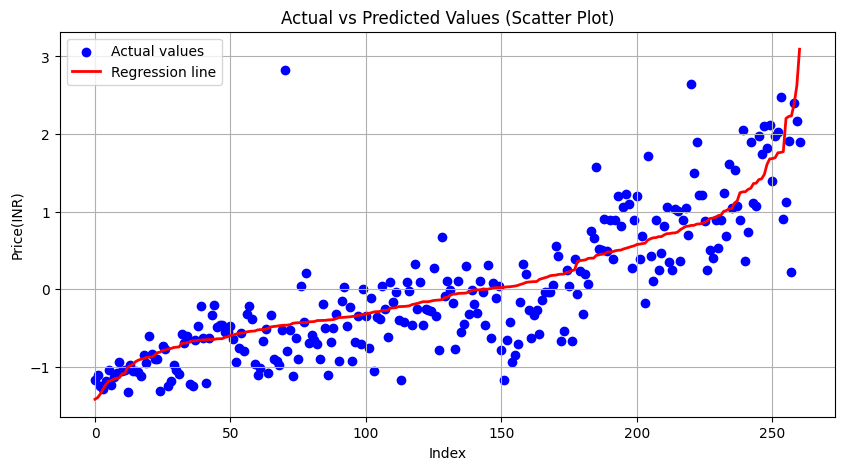

In [67]:
plt.figure(figsize=(10, 5))


plt.scatter(results.index,results['Actual'], color='blue', label='Actual values')
plt.plot(results.index,results['pred'], color='red', linewidth=2, label='Regression line')


plt.title('Actual vs Predicted Values (Scatter Plot)')
plt.xlabel('Index')
plt.ylabel('Price(INR)')
plt.grid(True)
plt.legend()
plt.show()

Multiple Linear Regression is a relatively basic regression model and may not provide the optimal solution for predicting laptop prices. 

After further exploration, I decided to experiment with other regression models to see if they could improve prediction accuracy and better achieve the desired forecasting results.

SVR Model

In [68]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train, y_train)
y_pred_svr = regressor.predict(x_test)
np.set_printoptions(precision=2)
r2_score(y_test, y_pred_svr)

c:\Users\lenovo\.conda\envs\nlp\lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.5771203183032507

Decision Tree Regression model


To improve accuracy, I set and adjust the `max_depth` for the Decision Tree Model.

In [69]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(max_depth=40,random_state = 0)
regressor.fit(x_train, y_train)
y_pred_dtree = regressor.predict(x_test)
np.set_printoptions(precision=2)
r2_score(y_test, y_pred_dtree)

0.7130732958063506

Random Forest Model


By setting `n_estimators=15`, I controlled the model to use 15 decision trees. 

Typically, more trees can improve the model's predictive accuracy by reducing variance and capturing more complex patterns.

Additionally, I set `random_state=0` to fix the random seed, ensuring that the model's results are consistent every time it is run. 

In [70]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 15, random_state = 0)
regressor.fit(x_train, y_train)
y_pred_rft = regressor.predict(x_test)
np.set_printoptions(precision=2)
r2_score(y_test, y_pred_rft)

c:\Users\lenovo\.conda\envs\nlp\lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.7378901977248653

After comparison, I found that among `Multiple Regression`, `SVR`, `Decision Tree Regression`, and `Random Forest Regression`, the `Random Forest model` had the highest prediction accuracy, with an R² value of 0.74.

It is worth noting that when I kept the model parameters unchanged but used `label encoding` for all features and discarded `one-hot encoding`, the R² value of Random Forest Regression increased to 0.76.

I was curious about this change, so I did some research. 

The reason for this difference could be that `label encoding` assigns a numerical value to each category in the categorical variable. This encoding method may be more suitable for tree-based models. 

However, this conclusion may not be entirely accurate, which has driven me to further explore how to choose appropriate feature engineering strategies for different models.

## Conclusion

In this week's project, I conducted the core steps of data preprocessing and feature engineering, which provided a relatively accurate data foundation for different regression models. Afterward, I continuously adjusted the feature engineering strategy to train and compare these regression models, and obtained the one with the highest accuracy.

In data preprocessing, I learned how to effectively observe and analyze the raw dataset, such as by checking the data types of columns and the unique values to determine the subsequent feature processing strategies. I also explored a new method for handling missing values, using mode imputation in cases where there were a significant amount of missing values but the data categories were relatively concentrated. Compared to simply discarding missing values, this approach improved the utilization and validity of the dataset.

During the feature engineering stage, I used regex and various encoding techniques to process different types of features, and the effectiveness of these approaches was reflected in the model's accuracy. Finally, training the regression models helped me fully understand and master the fundamental processes of machine learning, laying a foundation for producing practical applications. The attempts with various regression models also deepened my understanding of the result performance differences between models.

As the project progressed, I encountered some difficulties and recognized gaps in my knowledge. In feature engineering, I realized that some features could be processed further instead of simply encoding them. For example, the Storage feature consists of both storage size and storage medium type (e.g., 256GB SSD and 500GB HDD), which actually represent different dimensions. If I simply extracted the numeric part of the storage size for comparison, the storage medium type would be ignored, leading to a loss of data validity. I believe there may be better ways to handle this feature.

Additionally, my understanding of feature processing and how to adapt it to different models is still not clear enough. This limited my ability to adjust my feature processing strategy according to the specific requirements of each model, which ultimately affected the accuracy of the regression model.

For this project, I plan to focus on adjusting feature strategies to optimize model performance. First, I will delve deeper into the principles and application scenarios of different models, as well as their specific feature requirements. For instance, linear regression may have a stronger dependency on linear relationships in the data, while tree-based models are better equipped to handle non-linear relationships. At the same time, I will expand my knowledge by exploring more projects and case studies to understand how to conduct targeted feature engineering, using various techniques to extract deeper insights from the features, ultimately achieving better model optimization.

